In [1]:
# 1. Import Libraries
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2. Load Dataset - ETL
# ---------------------------
df = pd.read_csv(r"C:\Users\sindh\OneDrive\Desktop\infosys practice\air_quality.csv")
print("✅ Dataset Loaded Successfully")
print("Shape of Data:", df.shape)
print("Columns:", df.columns.tolist())
print("\nSample Data:\n", df.head())


✅ Dataset Loaded Successfully
Shape of Data: (1000, 10)
Columns: ['Date', 'City', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity']

Sample Data:
          Date       City   PM2.5    PM10    NO2    SO2    CO      O3  \
0  2023-01-01      Delhi  131.13  114.80  33.55  35.27  1.76   53.30   
1  2023-01-01     Mumbai  286.69  239.67  32.23  40.85  2.44   62.08   
2  2023-01-01    Chennai  227.64  355.53  91.56  16.27  2.30  104.00   
3  2023-01-01    Kolkata  191.64  306.28  32.46  33.12  0.55   47.40   
4  2023-01-01  Bangalore   72.13  332.30  34.48  30.73  0.53  105.66   

   Temperature  Humidity  
0         31.2      22.7  
1         19.3      33.1  
2         36.8      78.2  
3         30.3      73.7  
4         18.9      44.5  


In [3]:
# 3. Data Wrangling & EDA
# ---------------------------

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill or drop missing values (depending on your dataset)
df = df.fillna(df.mean(numeric_only=True))

# Convert categorical columns to numeric if any
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
print("\n✅ Converted Categorical Columns to Numeric (if any)")

# Summary statistics
print("\nStatistical Summary:\n", df.describe())


Missing Values:
 Date           0
City           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
dtype: int64

✅ Converted Categorical Columns to Numeric (if any)

Statistical Summary:
               Date         City        PM2.5         PM10          NO2  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     99.500000     2.000000   162.369240   227.456130    55.216430   
std      57.763194     1.414921    78.877205   102.266455    26.160706   
min       0.000000     0.000000    31.250000    51.130000    10.000000   
25%      49.750000     1.000000    93.712500   134.375000    33.520000   
50%      99.500000     2.000000   164.140000   231.555000    55.055000   
75%     149.250000     3.000000   230.970000   316.162500    78.320000   
max     199.000000     4.000000   299.920000   399.790000    99.800000   

               SO2           CO           O3  Temperatur

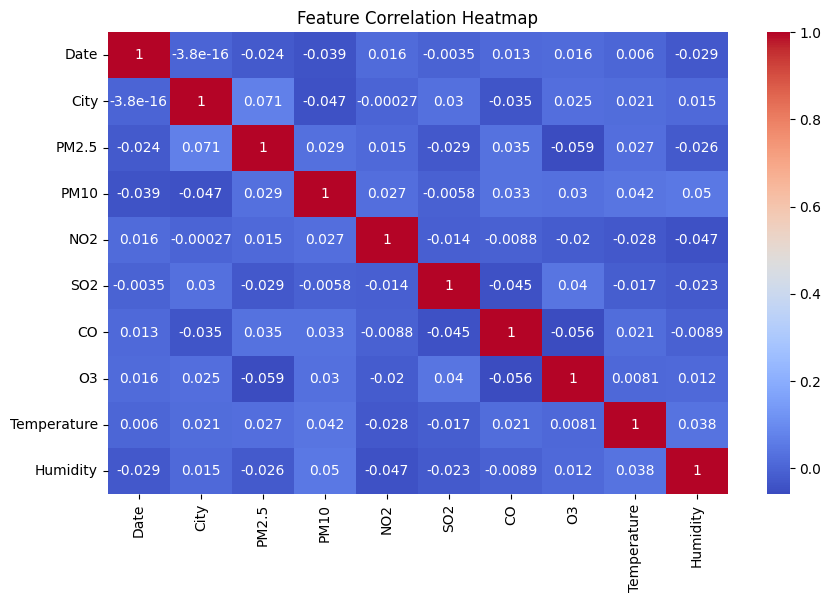

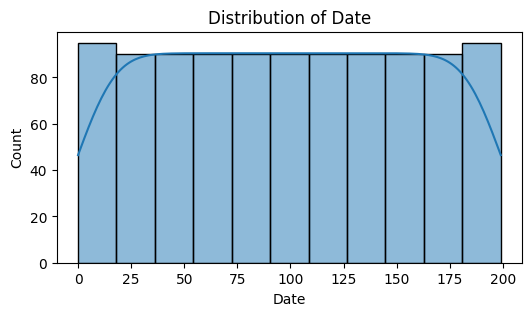

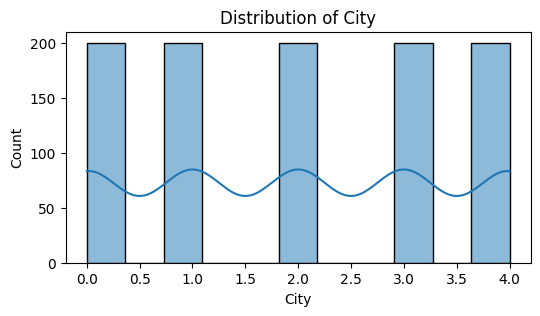

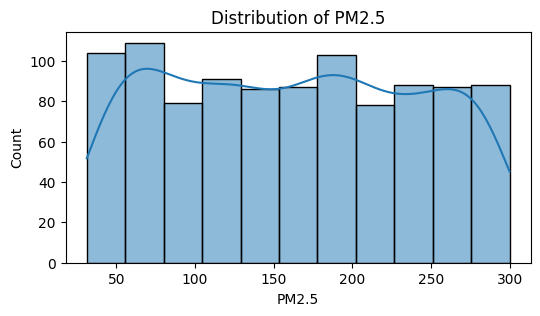

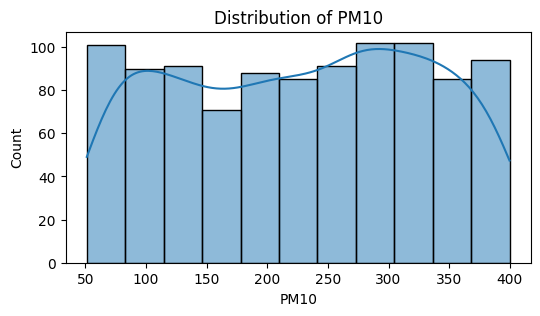

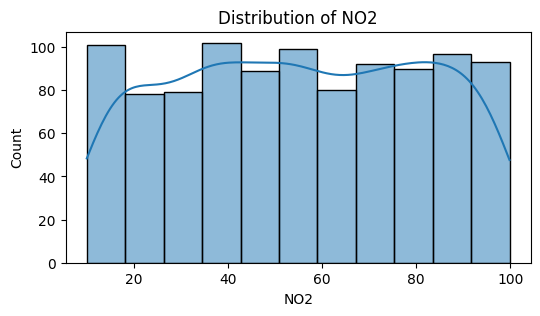

In [4]:
# 4. Visualize Dataset
# ---------------------------
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Plot pollutants distribution
for col in df.select_dtypes(include=[np.number]).columns[:5]:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [5]:
# 5. Split the Dataset
# ---------------------------
# Choose target column (you can change as needed)
target_col = 'PM2.5' if 'PM2.5' in df.columns else df.columns[-1]
X = df.drop(columns=[target_col])
y = df[target_col]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("\n✅ Data Split Done")
print("Train Shape:", X_train.shape, "Test Shape:", X_test.shape)


✅ Data Split Done
Train Shape: (800, 9) Test Shape: (200, 9)


In [6]:
# 6. Build ML Model
# ---------------------------
# Based on your air quality forecasting context — regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
print("\n✅ Model Selected: RandomForestRegressor")



✅ Model Selected: RandomForestRegressor


In [7]:
# 7. Train the Model
# ---------------------------
model.fit(X_train, y_train)
print("\n✅ Model Training Completed")



✅ Model Training Completed


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load sample data
data = load_iris()
X = data.data
y = data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [5]:
# 8. Test the Model
# ---------------------------
y_pred = model.predict(X_test)
print("\n✅ Model Testing Completed")


✅ Model Testing Completed



✅ Model Evaluation Results:
RMSE: 79.1285
MAE : 67.8674
R2 Score: -0.0308


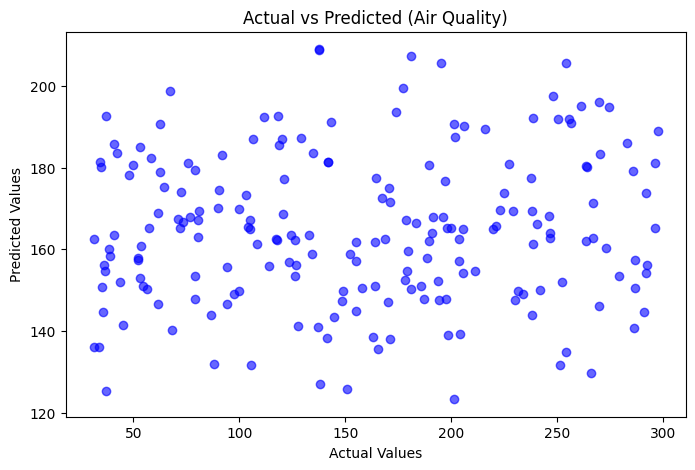

In [9]:
# 9. Check Accuracy
# ---------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n✅ Model Evaluation Results:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Air Quality)")
plt.show()


In [10]:
# 10. Predict New Data
# ---------------------------
# Example: predict for a new data sample (first row)
new_data = X_test[0].reshape(1, -1)
predicted_value = model.predict(new_data)
print("\n✅ Prediction on New Data:", predicted_value)


✅ Prediction on New Data: [163.3827]
